# Effects of Big Data on the Healthcare System

In this project, we're going to demonstrate the effects of big data on the healthcare system. We will achieve this by using a dataset to build machine learning models that can help in the diagnosis of heart disease. The models will the be used in a simple web application powered by Python(django backend) and JavaScript(React frontend) that users can access to predict their likelyhood of having heart disease.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## Exploratory Data Analysis

### Import dataset

In [2]:
df = pd.read_csv("heart_2020_cleaned.csv")

### Balance target classes by reducing the majority class

In [3]:
# Count all the rows
all_count = len(df)
print(f"All count: {all_count}")

# Count positive class (positive: has heart disease)
positive = df[df["HeartDisease"]=="Yes"]
positive_count = len(positive)
print(f"Positive count: {positive_count}")

# Count negative class (positive)
negative = df[df["HeartDisease"]=="No"]
negative_count = len(negative)
print(f"Negative count: {negative_count}")

# Reduce Majority class by taking a random sample equal to the minority class
negative_reduced = negative.sample(n=positive_count)
negative_reduced_count = len(negative_reduced)
print(f"Reduced negative count: {negative_reduced_count}")

# Create a balance dataframe
df = pd.concat([positive, negative_reduced])
df.head()
print(f"Final count: {len(df)}")


All count: 319795
Positive count: 27373
Negative count: 292422
Reduced negative count: 27373
Final count: 54746


### Explore dataset

In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No


In [5]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
17217,No,28.19,No,No,No,30.0,0.0,Yes,Female,80 or older,White,No,No,Good,8.0,No,No,No
173677,No,34.21,Yes,No,No,3.0,0.0,Yes,Male,70-74,White,Yes,No,Fair,7.0,No,No,No
112367,No,29.86,No,No,No,3.0,15.0,No,Female,35-39,White,No,Yes,Good,9.0,No,No,No
96909,No,28.34,No,No,No,0.0,0.0,No,Male,50-54,White,No,Yes,Good,5.0,Yes,No,No
27721,No,27.62,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Good,7.0,No,No,No


In [6]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [7]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [8]:
df.index

Index([     5,     10,     35,     42,     43,     45,     77,     78,    101,
          127,
       ...
       142281,  47052,  93352,  52224, 159471,  17217, 173677, 112367,  96909,
        27721],
      dtype='int64', length=54746)

In [9]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,54746.000000,54746.000000,54746.000000,54746.000000
mean,28.782946,5.389398,4.229953,7.121689
std,6.464983,9.957802,8.520487,1.605528
min,12.160000,0.000000,0.000000,1.000000
25%,24.390000,0.000000,0.000000,6.000000
50%,27.690000,0.000000,0.000000,7.000000
75%,32.080000,5.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54746 entries, 5 to 27721
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      54746 non-null  object 
 1   BMI               54746 non-null  float64
 2   Smoking           54746 non-null  object 
 3   AlcoholDrinking   54746 non-null  object 
 4   Stroke            54746 non-null  object 
 5   PhysicalHealth    54746 non-null  float64
 6   MentalHealth      54746 non-null  float64
 7   DiffWalking       54746 non-null  object 
 8   Sex               54746 non-null  object 
 9   AgeCategory       54746 non-null  object 
 10  Race              54746 non-null  object 
 11  Diabetic          54746 non-null  object 
 12  PhysicalActivity  54746 non-null  object 
 13  GenHealth         54746 non-null  object 
 14  SleepTime         54746 non-null  float64
 15  Asthma            54746 non-null  object 
 16  KidneyDisease     54746 non-null  object 
 17

In [11]:
len(df)

54746

### Explore binary features

#### Smoking

In [12]:
pd.crosstab(df["HeartDisease"], df["Smoking"])

Smoking,No,Yes
HeartDisease,,
No,16561,10812
Yes,11336,16037


#### Alcohol drinking

In [13]:
pd.crosstab(df["HeartDisease"], df["AlcoholDrinking"])

AlcoholDrinking,No,Yes
HeartDisease,,
No,25460,1913
Yes,26232,1141


#### Sex

In [14]:
pd.crosstab(df["HeartDisease"], df["Sex"])

Sex,Female,Male
HeartDisease,,
No,14759,12614
Yes,11234,16139


#### Stroke 

In [15]:
pd.crosstab(df["HeartDisease"], df["Stroke"])

Stroke,No,Yes
HeartDisease,,
No,26663,710
Yes,22984,4389


#### Asthma

In [16]:
pd.crosstab(df["HeartDisease"], df["Asthma"])

Asthma,No,Yes
HeartDisease,,
No,23801,3572
Yes,22440,4933


#### Skin cancer

In [17]:
pd.crosstab(df["HeartDisease"], df["SkinCancer"])

SkinCancer,No,Yes
HeartDisease,,
No,25007,2366
Yes,22393,4980


#### Kidney Disease

In [18]:
pd.crosstab(df["HeartDisease"], df["KidneyDisease"])

KidneyDisease,No,Yes
HeartDisease,,
No,26620,753
Yes,23918,3455


#### Difficulty Walking

In [19]:
pd.crosstab(df["HeartDisease"], df["DiffWalking"])

DiffWalking,No,Yes
HeartDisease,,
No,24189,3184
Yes,17345,10028


### Explore numerical features

#### BMI

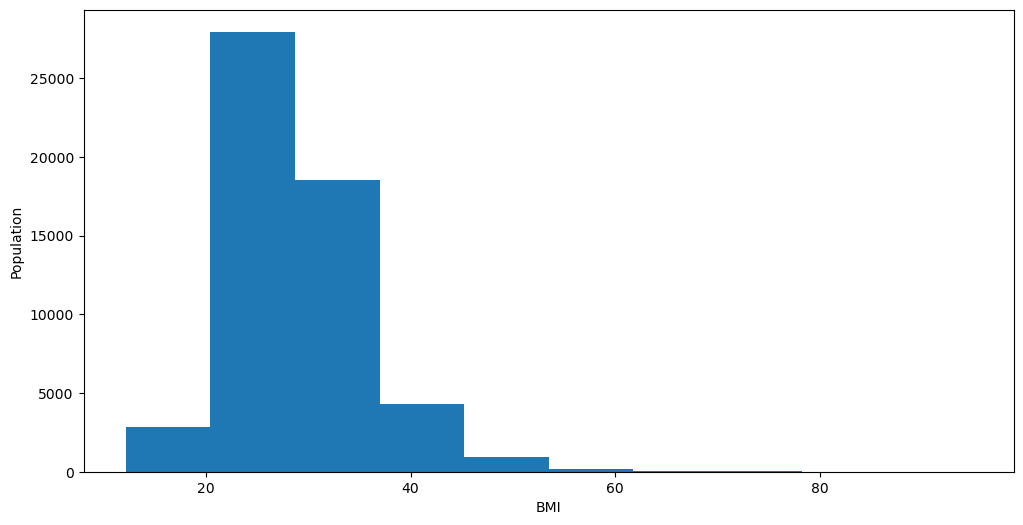

In [20]:
fig, ax = plt.subplots(figsize=(12, 6));
ax.hist(x=df["BMI"]);
ax.set(
    xlabel="BMI",
    ylabel="Population"
);

#### MentalHealth

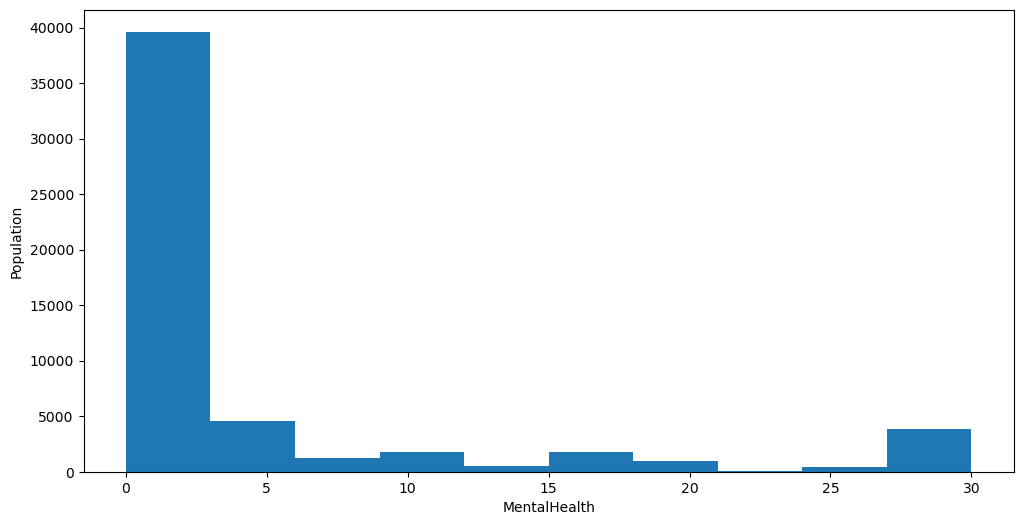

In [21]:
fig, ax = plt.subplots(figsize=(12, 6));
ax.hist(x=df["MentalHealth"]);
ax.set(
    xlabel="MentalHealth",
    ylabel="Population"
);

#### PhysicalHealth

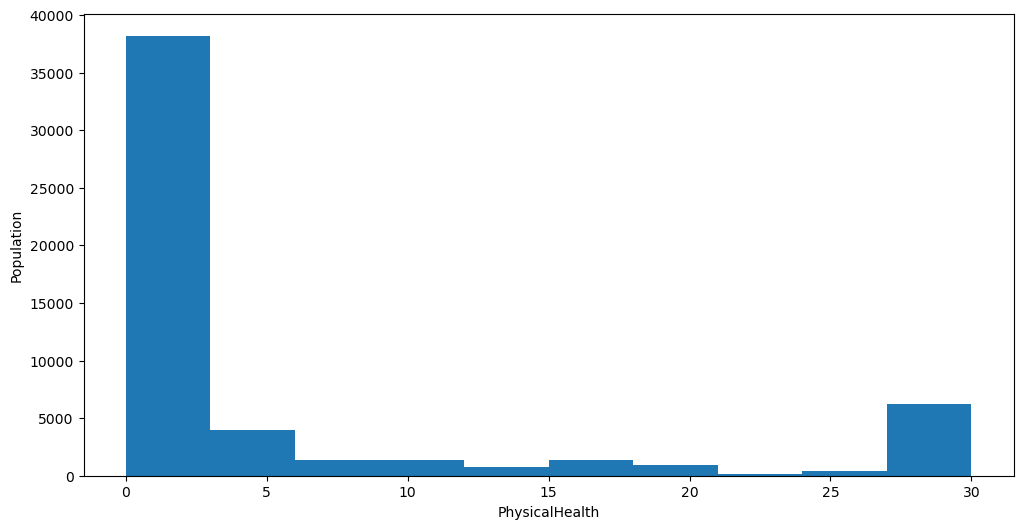

In [22]:
fig, ax = plt.subplots(figsize=(12, 6));
ax.hist(x=df["PhysicalHealth"]);
ax.set(
    xlabel="PhysicalHealth",
    ylabel="Population"
);

#### SleepTime

[Text(0.5, 1.0, 'Relationship between BMI and Sleep Time'),
 Text(0.5, 0, 'Sleep Time (Hrs)'),
 Text(0, 0.5, 'BMI')]

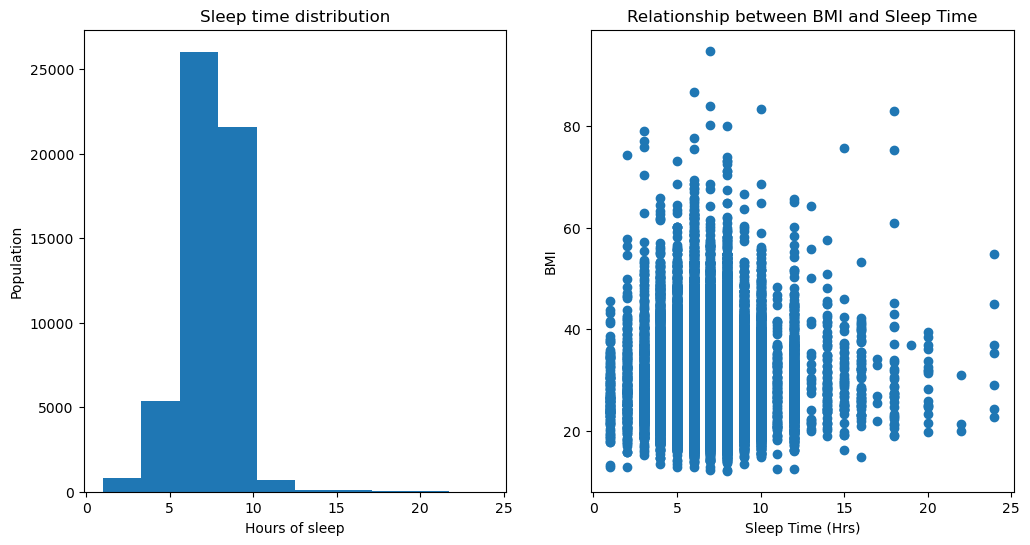

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 6));
ax1.hist(x=df["SleepTime"]);
ax1.set(
    title="Sleep time distribution",
    xlabel="Hours of sleep",
    ylabel="Population"
);

ax2.scatter(x=df["SleepTime"], y=df["BMI"]);
ax2.set(
    title="Relationship between BMI and Sleep Time",
    xlabel="Sleep Time (Hrs)",
    ylabel="BMI"
)



### Explore categorical features

#### AgeCategory

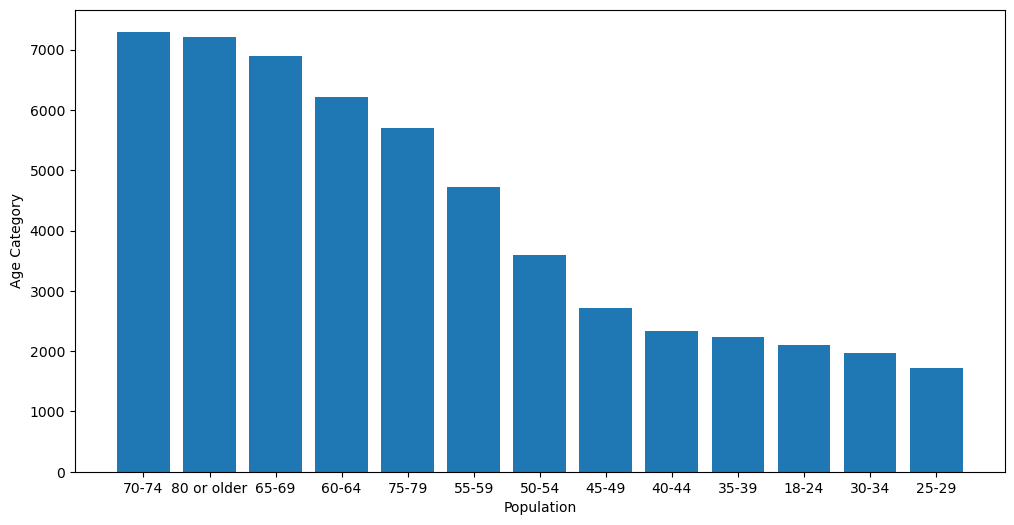

In [24]:
s = df["AgeCategory"].value_counts();
fig, ax = plt.subplots(figsize=(12,6));
ax.bar(x=s.index, height=s.values);

ax.set(
    xlabel="Population",
    ylabel="Age Category"
);

#### General Health

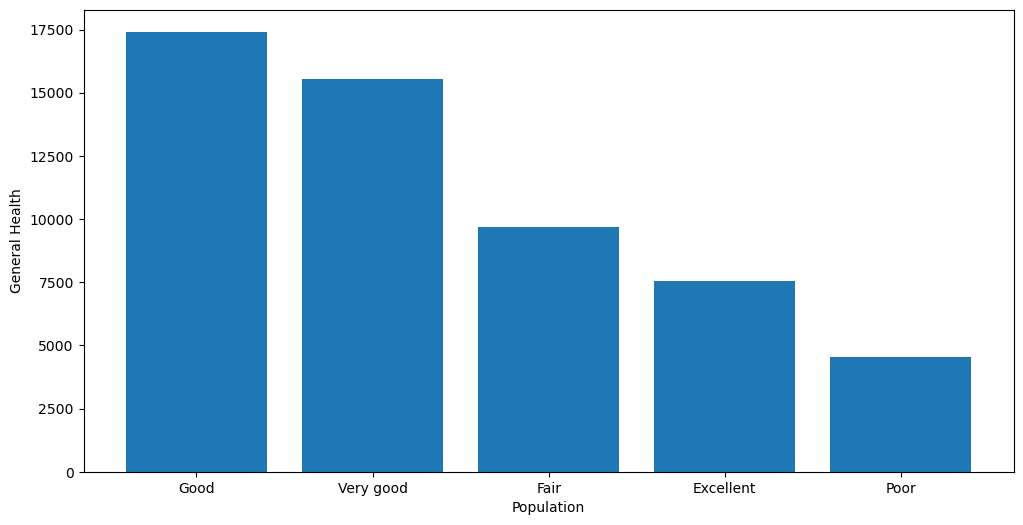

In [25]:
s = df["GenHealth"].value_counts();
fig, ax = plt.subplots(figsize=(12,6));
ax.bar(x=s.index, height=s.values);

ax.set(
    xlabel="Population",
    ylabel="General Health"
);

#### Race

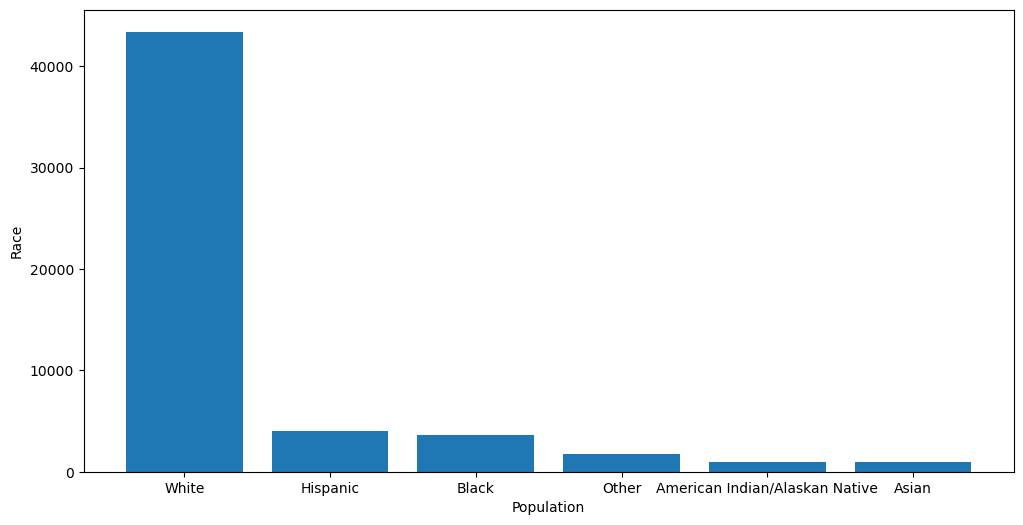

In [26]:
s = df["Race"].value_counts()
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x=s.index, height=s.values);
ax.set(
    xlabel="Population",
    ylabel="Race"
);

#### Diabetic

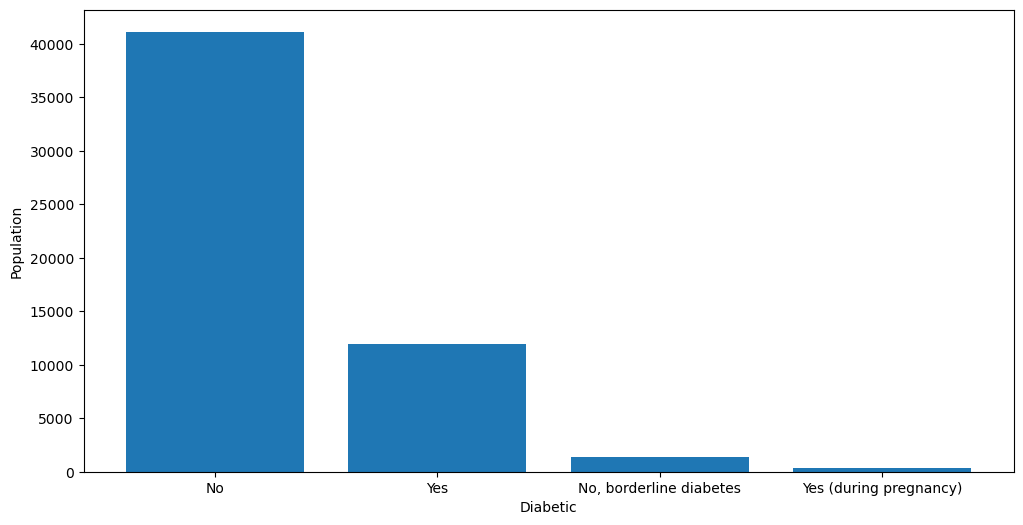

In [27]:
s = df["Diabetic"].value_counts()
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x=s.index, height=s.values);
ax.set(
    xlabel="Diabetic",
    ylabel="Population"
);

## Prepare Data

### Convert binary features to numbers

In [28]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17217,No,28.19,No,No,No,30.0,0.0,Yes,Female,80 or older,White,No,No,Good,8.0,No,No,No
173677,No,34.21,Yes,No,No,3.0,0.0,Yes,Male,70-74,White,Yes,No,Fair,7.0,No,No,No
112367,No,29.86,No,No,No,3.0,15.0,No,Female,35-39,White,No,Yes,Good,9.0,No,No,No
96909,No,28.34,No,No,No,0.0,0.0,No,Male,50-54,White,No,Yes,Good,5.0,Yes,No,No


In [29]:
df["HeartDisease"] = df["HeartDisease"].replace({"Yes":1, "No":0})
df["Smoking"] = df["Smoking"].replace({"Yes":1, "No":0})
df["AlcoholDrinking"] = df["AlcoholDrinking"].replace({"Yes":1, "No":0})
df["Stroke"] = df["Stroke"].replace({"Yes":1, "No":0})
df["DiffWalking"] = df["DiffWalking"].replace({"Yes":1, "No":0})
df["Sex"] = df["Sex"].replace({"Male":1, "Female":0})
df["PhysicalActivity"] = df["PhysicalActivity"].replace({"Yes":1, "No":0})
df["Asthma"] = df["Asthma"].replace({"Yes":1, "No":0})
df["KidneyDisease"] = df["KidneyDisease"].replace({"Yes":1, "No":0})
df["SkinCancer"] = df["SkinCancer"].replace({"Yes":1, "No":0})

df

/tmp/ipykernel_7578/3918562933.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["HeartDisease"] = df["HeartDisease"].replace({"Yes":1, "No":0})
/tmp/ipykernel_7578/3918562933.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Smoking"] = df["Smoking"].replace({"Yes":1, "No":0})
/tmp/ipykernel_7578/3918562933.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future b

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,1,28.87,1,0,0,6.0,0.0,1,0,75-79,Black,No,0,Fair,12.0,0,0,0
10,1,34.30,1,0,0,30.0,0.0,1,1,60-64,White,Yes,0,Poor,15.0,1,0,0
35,1,32.98,1,0,1,10.0,0.0,1,1,75-79,White,Yes,1,Poor,4.0,0,0,1
42,1,25.06,0,0,0,0.0,0.0,1,0,80 or older,White,Yes,0,Good,7.0,0,0,1
43,1,30.23,1,0,0,6.0,2.0,1,0,75-79,White,Yes,1,Fair,8.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17217,0,28.19,0,0,0,30.0,0.0,1,0,80 or older,White,No,0,Good,8.0,0,0,0
173677,0,34.21,1,0,0,3.0,0.0,1,1,70-74,White,Yes,0,Fair,7.0,0,0,0
112367,0,29.86,0,0,0,3.0,15.0,0,0,35-39,White,No,1,Good,9.0,0,0,0
96909,0,28.34,0,0,0,0.0,0.0,0,1,50-54,White,No,1,Good,5.0,1,0,0


### Split data into features and labels

In [30]:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

### Split data into training and test set

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Turn categorical features into numbers

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Diabetic', 'Race', 'GenHealth', 'AgeCategory']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder="passthrough")

t_X = transformer.fit_transform(X)

### Split data into train and test sets with transformed categorical features

In [33]:
X_train, X_test, y_train, y_test = train_test_split(t_X, y, test_size=0.2)

df = pd.DataFrame(X_train)
df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,8.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,7.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,30.0,0.0,1.0,1.0,1.0,8.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,8.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43791,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,30.0,0.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0
43792,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0
43793,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
43794,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0
